In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE  ## For oversampling technique.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import pickle


## 2. Data Loading and Understanding.

In [79]:
# Load the Data_set

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.shape  # Number of Rows and Columns

(7043, 21)

In [6]:
df.columns # What all 21 columns contains.

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
pd.set_option("display.max_columns",None) # Used to diaplay all the head elements.

In [10]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [11]:
print(df['gender'].unique())

['Female' 'Male']


In [12]:
for col in df.columns:
    print(col,df[col].unique())
    print("-"*50)

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSec

In [13]:
# Printing the Unique values in all the columns

numerical_features_list = ['tenure','MonthlyCharges','TotalCharges']

for col in df.columns:
    if col not in numerical_features_list:
        print(col,df[col].unique())
        print("-"*50)

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
---------------------------------------

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:


df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df["TotalCharges"] = df["TotalCharges"].astype

In [17]:
df["TotalCharges"].dtype

dtype('O')

In [18]:
# Converting the "Total Charges" into Float

# df["TotalCharges"] = df["TotalCharges"].astype(float)



In [19]:
df[df["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [20]:
len(df[df["TotalCharges"]==" "])

0

In [21]:
# df["TotalCharges"] = df["TotalCharges"].replace({" ":"0.0"})

In [77]:
# df["TotalCharges"] = df["TotalCharges"].astype(float)

# Convert to numeric safely; any non-numeric value becomes NaN
# df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')


In [80]:
df["TotalCharges"].dtype

dtype('O')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
## Checking the class Distribution of Target Column.

print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


## Insights:

**1. Customer ID removed as it is not required for modelling.**  
**2. No misiing values in the dataset.**  
**3. Misiing values in the TotalCharges column were replaced with 0.**  
**4. Class Imbalance identified in the target.**  


## 3. EDA (Exploatory Data Analysis)

In [26]:
df.shape
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
df.head(2)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,NaN,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,NaN,No


In [28]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,0.0
mean,0.162147,32.371149,64.761692,NaN
std,0.368612,24.559481,30.090047,NaN
min,0.000000,0.000000,18.250000,NaN
25%,0.000000,9.000000,35.500000,NaN
50%,0.000000,29.000000,70.350000,NaN
75%,0.000000,55.000000,89.850000,NaN
max,1.000000,72.000000,118.750000,NaN


### Numerical Features - Analysis

Understand the Distribution of the numerical features..


In [68]:
def plot_histogram(df , column_name):
    plt.figure(figsize=(5,3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distributed of {column_name}")

    # Calculate mean and median value for the columns

    col_mean = df[column_name].mean()
    col_median = df[column_name].median()


    # Add vertical lines for mean and median
    plt.axvline(col_mean , color ="red" , linestyle="--" , label = "Mean")
    plt.axvline(col_median , color="green", linestyle="-" , label ="Median")

    plt.legend()
    
    plt.show()

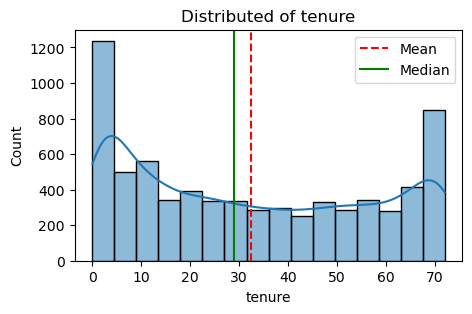

In [69]:
plot_histogram(df ,"tenure")

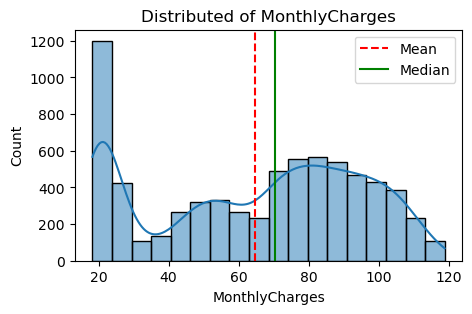

In [70]:
plot_histogram(df ,"MonthlyCharges")

In [81]:
df["TotalCharges"].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [82]:
df["TotalCharges"].dtype


dtype('O')

In [83]:
# Replace blank spaces with NaN
df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)

# Convert to numeric safely
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])


In [84]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


C:\Users\rohan\AppData\Local\Temp\ipykernel_2552\40832498.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


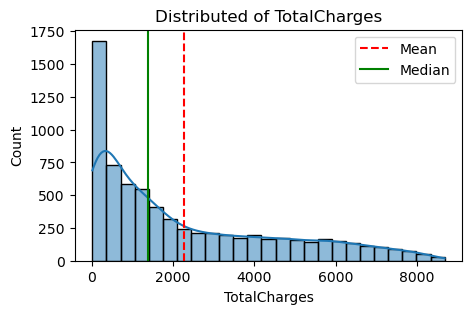

In [85]:
plot_histogram(df ,"TotalCharges")

#### Box Plot for Numerical Features : For Finding Outliers

In [87]:
def plot_boxplot(df,column_name):
    
    plt.figure(figsize=(6,3))
    sns.boxplot(y=df[column_name])
    plt.tilte(f"Box Plot {column_name}")
    plt.ylabel(column_name)
    plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'tilte'

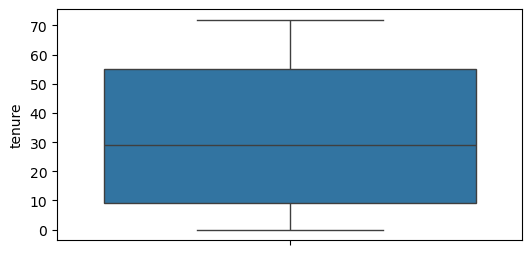

In [38]:
plot_boxplot(df,"tenure")

In [ ]:
plot_boxplot(df,"MonthlyCharges")

In [ ]:
plot_boxplot(df,"TotalCharges")

#### Coorelation Heatmap for numrical features  - For issue of Multi Colearity.

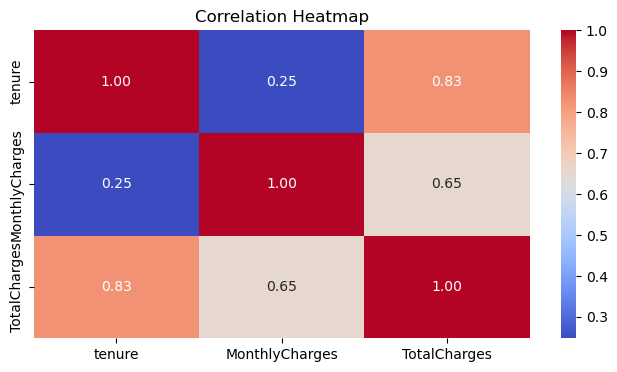

In [88]:
# Coorelation matrix - heatmap 

plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(), annot = True , cmap="coolwarm" , fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Categorical Features - Analysis

In [41]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Countplot for categorical columns

In [ ]:
# object_cols = df.select_dtypes(include ="object").columns.to_list()

# object_cols = ["SeniorCitizen"] + object_cols

# object_cols

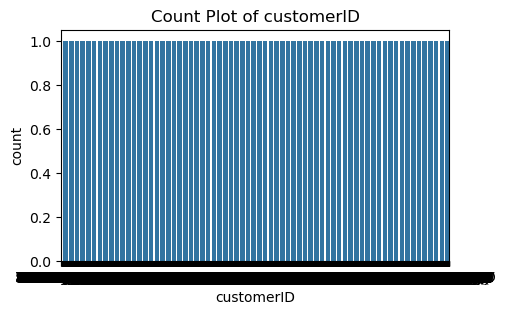

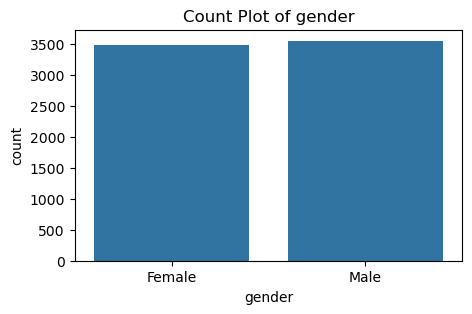

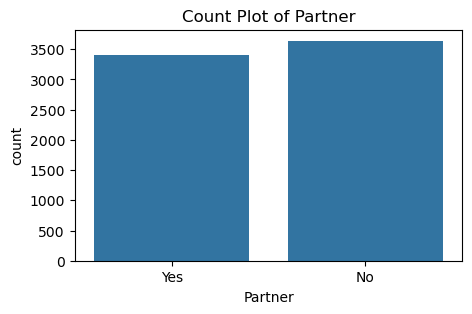

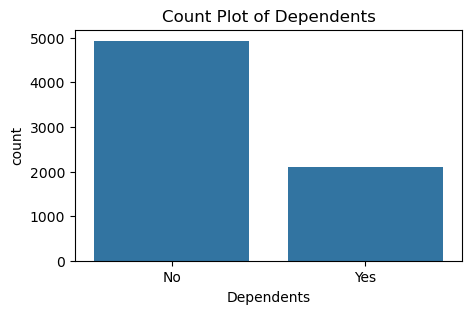

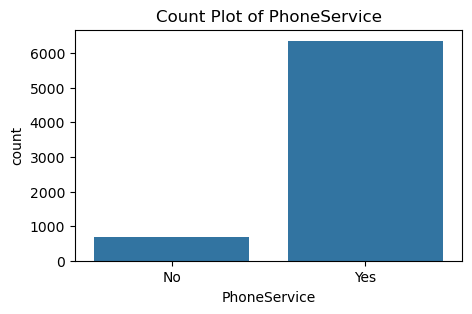

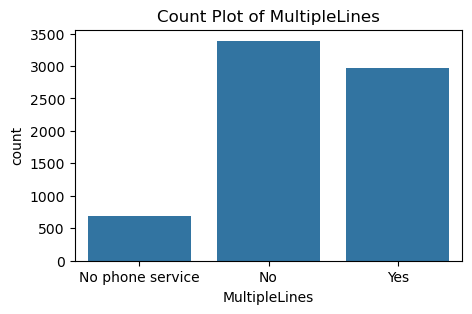

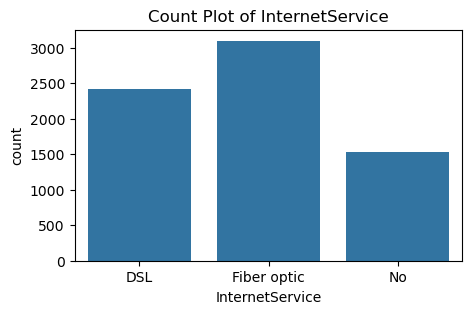

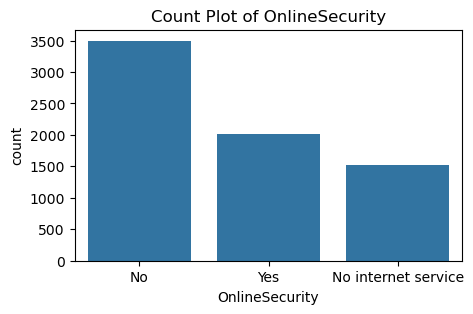

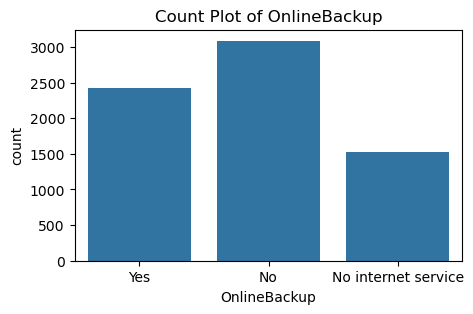

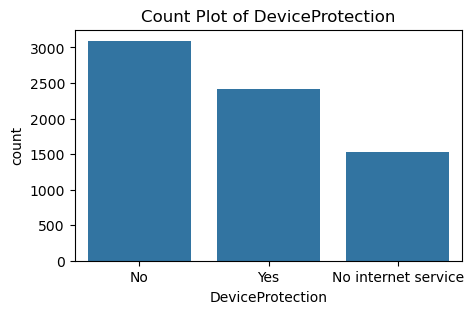

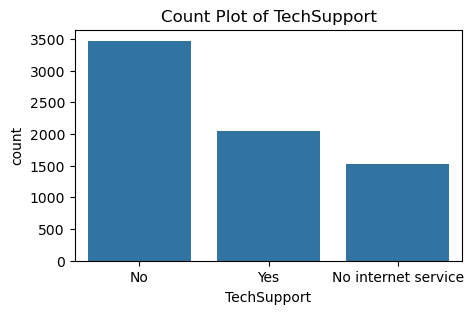

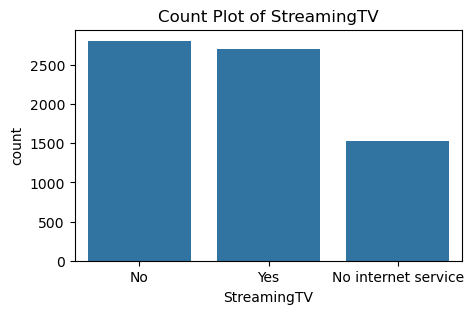

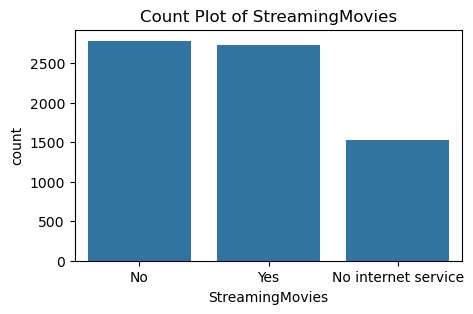

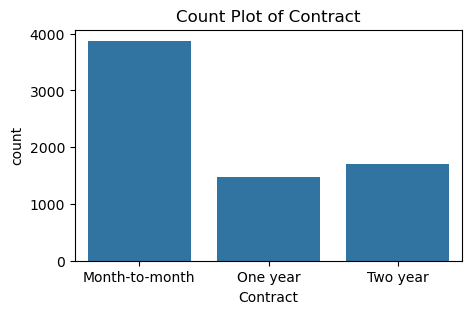

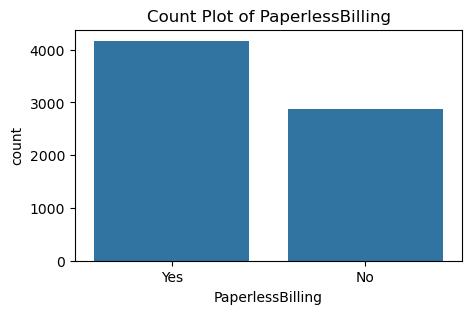

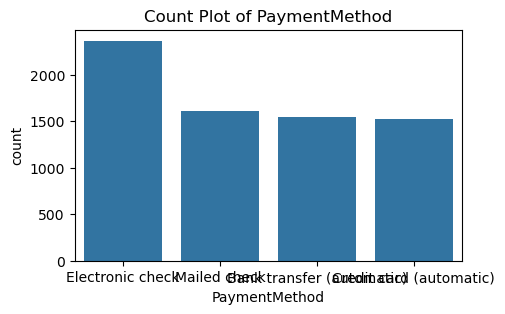

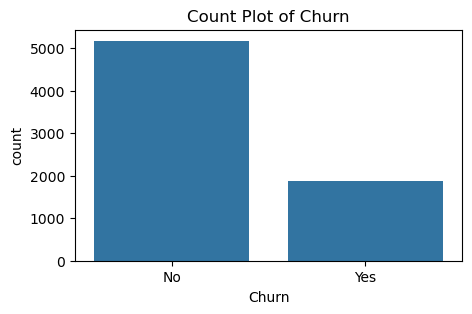

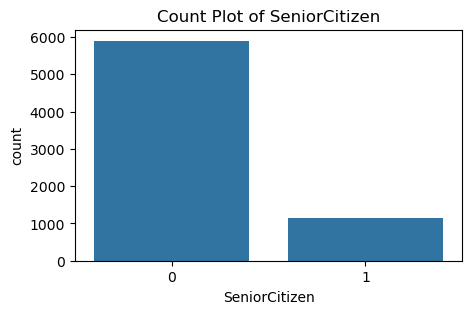

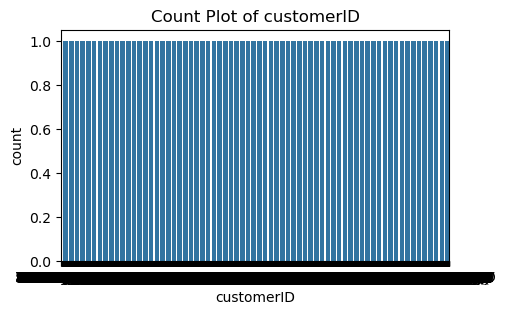

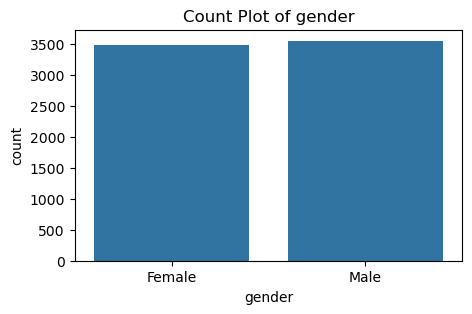

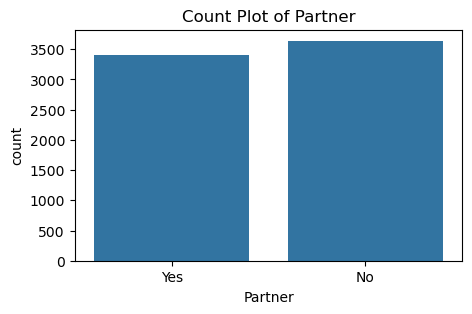

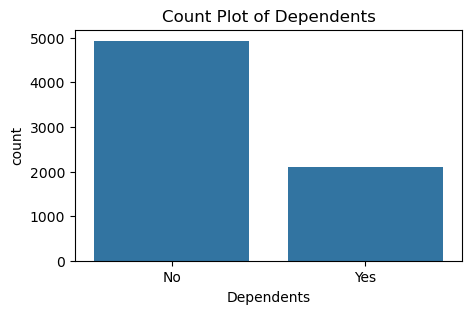

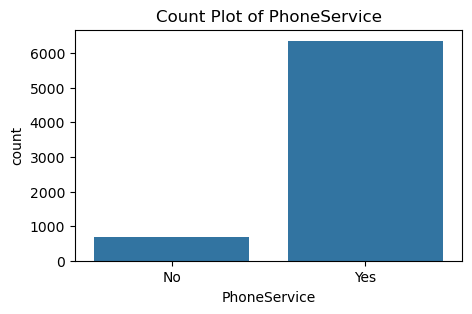

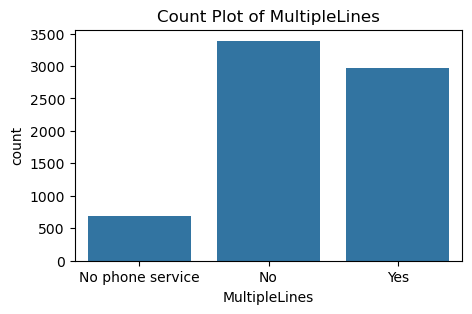

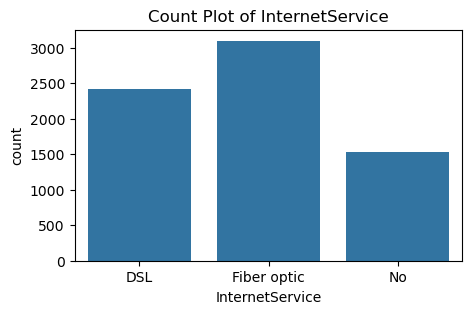

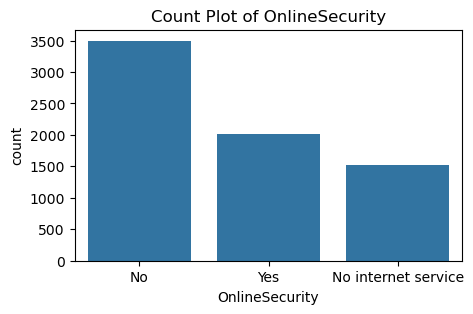

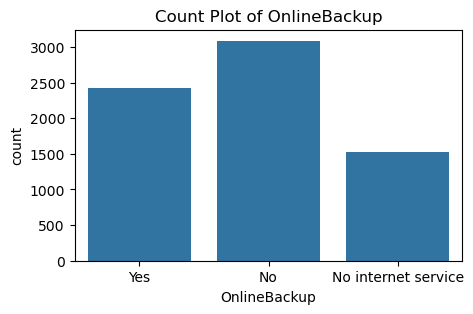

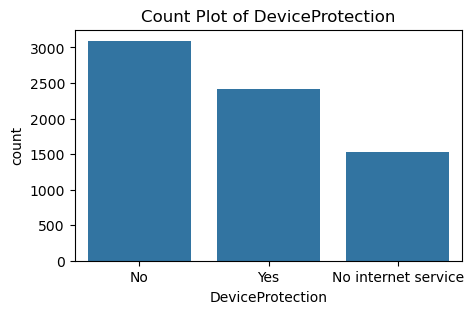

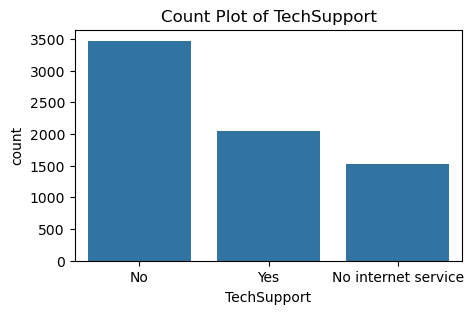

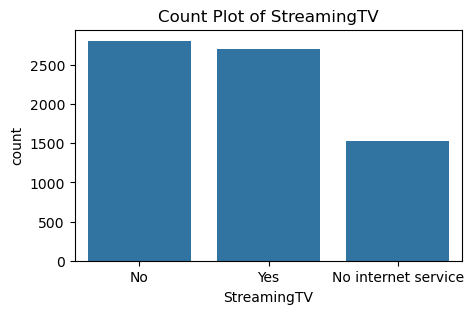

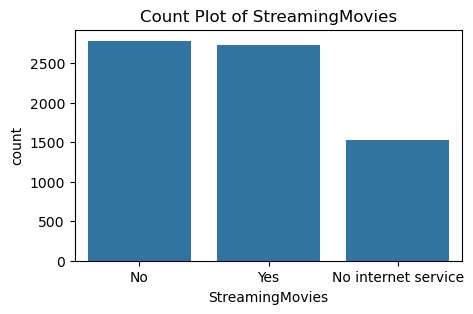

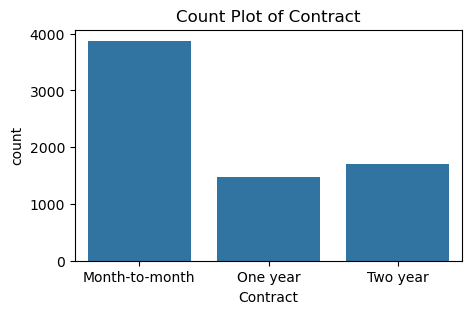

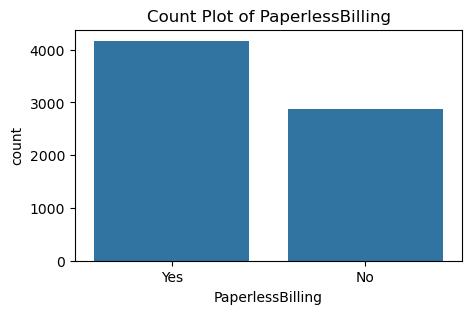

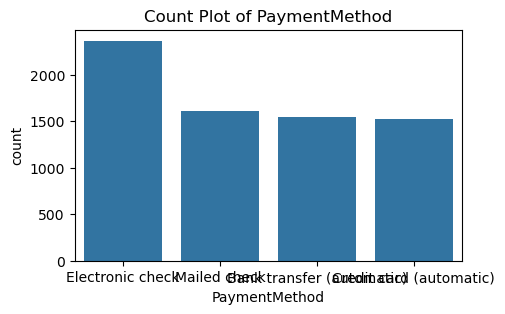

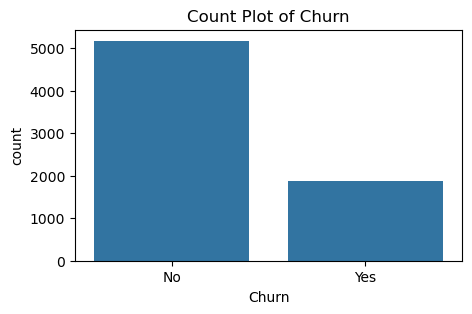

In [39]:
object_cols = df.select_dtypes(include ="object").columns.to_list()  ## Counts the Classes.

object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.show()

## 4. Data Preprocessing

**Label encoding of the target column**

In [95]:
df['Churn'] = df['Churn'].replace({"Yes":1 , "No" :0})

C:\Users\rohan\AppData\Local\Temp\ipykernel_2552\590242648.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({"Yes":1 , "No" :0})


In [96]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [97]:
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


**Label encoding to categorical features( Means which are Object types not numerical types)**

In [99]:
# Identifying columsn with object data type

object_columns = df.select_dtypes(include="object").columns

In [52]:
print(object_columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [100]:
# Initialize a dictionary to save the encoders
encoders = {}

# Apply label encoding and store the encoders

for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

# Save the encoders to a pickle file

with open("encoder.pkl","wb") as f:
    pickle.dump(encoders ,f)
    

In [101]:
encoders

{'customerID': LabelEncoder(),
 'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [102]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


 **Training and Test Data Split**

In [113]:
# Splitting the features and Target

X = df.drop(columns=['Churn'])
y = df['Churn']

In [116]:
print(X)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5375       0              0        1           0       1   
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  \
0                0              1                0               

In [110]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [ ]:
# Split Trainig and Test Data 

X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size = 0.2 , random_state = 42)  ## test_size = 0.2 means 20 % is test data and remainig 80 % is training data

In [121]:
print(y_train.shape)

(5634,)


In [123]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


**Synthetic Minority Oversampling Technique (SMOTE) --> SMOTE create a new data  point with the help of neighour data points**

In [125]:
smote = SMOTE(random_state = 42)


In [126]:
# Smote is only done on trainig data

X_train_smote , y_train_smote = smote.fit_resample(X_train , y_train)

In [127]:
print(y_train_smote.shape)

(8276,)


In [128]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


## 5. Model Training

**Trainig with Default Parameters** 


In [137]:
# dictionary of models

models = {
        "Decision Tree": DecisionTreeClassifier(random_state = 42),
        "Random Forest": RandomForestClassifier(random_state = 42),
        "XGBoost": XGBClassifier(random_state=42)
}

In [142]:
# Dictionary to store the cross validation results

cv_scores = {}

# Perform 5-ford cross validation for each model

for model_name , model in models.items():  ## model_name acts as "Key" and model act as "Value".
    # print(model_name)
    # print(model)
    # print("-"*50)
    print(f"Trainig {model_name} with default parameters")
    scores = cross_val_score(model , X_train_smote , y_train_smote , cv=5, scoring = "accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} cross_validation accuracy : {np.mean(scores):.2f}")
    print("-"* 80)
    

Trainig Decision Tree with default parameters
Decision Tree cross_validation accuracy : 0.78
--------------------------------------------------------------------------------
Trainig Random Forest with default parameters
Random Forest cross_validation accuracy : 0.84
--------------------------------------------------------------------------------
Trainig XGBoost with default parameters
XGBoost cross_validation accuracy : 0.83
--------------------------------------------------------------------------------


In [146]:
cv_scores

{'Decision Tree': array([0.68297101, 0.70996979, 0.81933535, 0.82779456, 0.83987915]),
 'Random Forest': array([0.73067633, 0.76858006, 0.90876133, 0.89909366, 0.90755287]),
 'XGBoost': array([0.6986715 , 0.7407855 , 0.9081571 , 0.9021148 , 0.91903323])}

**Since Random Forest has more accuracy as compare to other models with Default Parameters so we will use to train our model**

In [147]:
rfc = RandomForestClassifier(random_state=42)

In [153]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [151]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


## 6. Model Evaluation

In [156]:
# Evaluate on Test Data

y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report:\n",classification_report(y_test,y_test_pred))

Accuracy Score:
 0.7785663591199432
Confusion Matrix:
 [[873 163]
 [149 224]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1036
           1       0.58      0.60      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [157]:
X.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [166]:
# Save the train model as Pickle File.

model_data = {"model":rfc , "features_names": X.columns.tolist()}

with open("customer_churn_model.pkl","wb") as f:
    pickle.dump(model_data ,f)
    

## 7. Load the Saved Model and Build a Predictive System

In [167]:
# Load the Saved Model and the Label Encoders

with open("customer_churn_model.pkl","rb") as f:
    model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

In [168]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [169]:
print(feature_names)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [186]:
input_data = {
    "customerID": "7590-VHVEG",
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85
}


input_data_df = pd.DataFrame([input_data])

with open("encoder.pkl","rb") as f:
    encoders = pickle.load(f)
    
print(input_data_df.head())

    
#encoder categorical feartures using the saved encoders

for column , encoder in encoders.items():
    input_data_df[column] = encoder.transform(input_data_df[column])


# MAke a Prediction

prediction = loaded_model.predict(input_data_df) 
pred_prob = loaded_model.predict_proba(input_data_df)  # "predict_proba" : used to provide probabilty value.

print(prediction)

# Result

print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction Probablity:{pred_prob}")

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  
[0]
Prediction: No Churn
Prediction Probablity:[[0.85 0.15]]


In [ ]:
## Prediction Probablity:[[0.85 0.15]] --> Means the probablity of target '0' is (0.85) and for '1' is (0.15)..

In [178]:
input_data_df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [180]:
encoders

{'customerID': LabelEncoder(),
 'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

## TO DO : 

1. Implement HyperParameter Tuining
2. Try Model Selection
3. Try Downsampling
4. Try to resolve or address the Overfitting (By HyperParameter)
5. Try Startified k fold CV